In [2]:
polyEval(coeffs, pt) = sum([coeffs[i] * pt^(i-1) for i = 1:length(coeffs)])  

polyEval (generic function with 1 method)

In [3]:
using JSON

fcoeffs_Jul_AM = readall("../temp_files/fcoeffs_Jul_AM.json")
fcoeffs_Jul_AM = JSON.parse(JSON.parse(fcoeffs_Jul_AM))

fcoeffs_Jul_MD = readall("../temp_files/fcoeffs_Jul_MD.json")
fcoeffs_Jul_MD = JSON.parse(JSON.parse(fcoeffs_Jul_MD))

fcoeffs_Jul_PM = readall("../temp_files/fcoeffs_Jul_PM.json")
fcoeffs_Jul_PM = JSON.parse(JSON.parse(fcoeffs_Jul_PM))

fcoeffs_Jul_weekend = readall("../temp_files/fcoeffs_Jul_weekend.json")
fcoeffs_Jul_weekend = JSON.parse(JSON.parse(fcoeffs_Jul_weekend))

Dict{String,Any} with 4 entries:
  "fcoeffs7" => {0.204538271989302,0.7132358229624193,0.8208218473124012,0.1327…
  "fcoeffs8" => {0.28273895063862886,0.9916958276816129,0.9330991956668298,-0.1…
  "fcoeffs6" => {0.25336353978543297,0.7700999186619895,0.7200405579520197,-0.0…
  "fcoeffs9" => {0.20970024335279414,0.8682000893865015,1.254604477177359,-0.67…

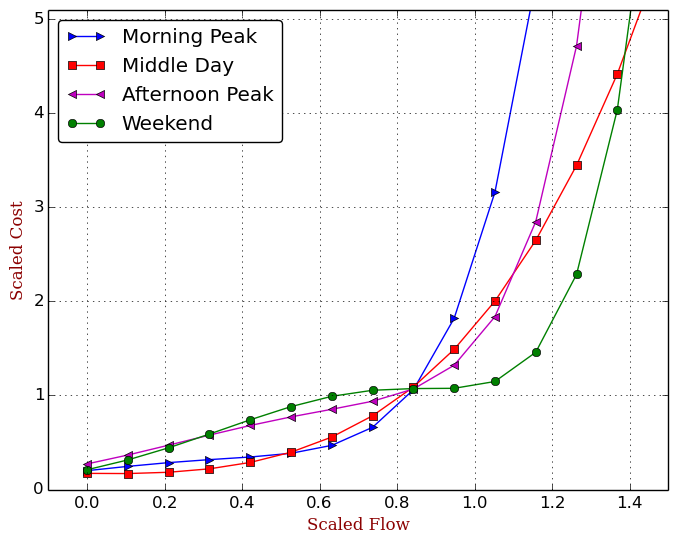

In [7]:
using PyPlot

fcoeffs_AM = fcoeffs_Jul_AM["fcoeffs9"]
fcoeffs_MD = fcoeffs_Jul_MD["fcoeffs6"]
fcoeffs_PM = fcoeffs_Jul_PM["fcoeffs9"]
fcoeffs_weekend = fcoeffs_Jul_weekend["fcoeffs9"]


xs = linspace(0, 2, 20)
#ys_true = map(x->polyEval(true_coeffs, x), xs)
#ys6 = map(x->polyEval(fcoeffs6, x), xs)
#ys7 = map(x->polyEval(fcoeffs7, x), xs)
ys_AM = map(x->polyEval(fcoeffs_AM, x), xs)
ys_MD = map(x->polyEval(fcoeffs_MD, x), xs)
ys_PM = map(x->polyEval(fcoeffs_PM, x), xs)
ys_weekend = map(x->polyEval(fcoeffs_weekend, x), xs)

# ys = map(x->polyEval(fcoeffs, x), xs)

#plot(xs, ys_true, "k", label="True")
#plot(xs, ys6, "o-c", label="deg=6")
#plot(xs, ys7, "s-r", label="deg=7")
plot(xs, ys_AM, ">-b", label="Morning Peak")
plot(xs, ys_MD, "s-r", label="Middle Day")
plot(xs, ys_PM, "<-m", label="Afternoon Peak")
plot(xs, ys_weekend, "o-g", label="Weekend")
legend(loc="upper left",fancybox="true") 
# plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 1.5, 0.01);
ylim(0.0, 5.1, 0.01);

font1 = ["family"=>"serif",
    "color"=>"darkred",
    "weight"=>"normal",
    "size"=>12]
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("../temp_files/fitting_comparison_Jul.pdf")